# Explore the data and create one table, visualization, or statistical analysis that you find interesting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy import create_engine

In [2]:
age_gender_code = pd.read_csv("Datasets/age_gender_codes.csv")
trips = pd.read_csv("Datasets/trip.csv")
person_ = pd.read_csv("Datasets/person.csv")


In [3]:
trips.head()

,tripid,personid,trip_path_distance,speed_mph,Destination purpose,Primary Mode
0,1710000501001,1710000501,2.299694071,13.798164,"Conducted personal business (e.g., bank, post ...",Household vehicle 1
1,1710000501002,1710000501,1.122817397,13.473809,Went grocery shopping,Household vehicle 1
2,1710000501003,1710000501,3.263440492,19.580643,Went home,Household vehicle 1
3,1710000501004,1710000501,8.126289938,19.503096,Went to religious/community/volunteer activity,Household vehicle 1
4,1710000501005,1710000501,8.044890337,24.134671,Went home,Household vehicle 1


## Examine Most Common Destination Purpose Reported Among the Ages of 18-24

In [5]:
import pymysql

pymysql.install_as_MySQLdb()

rds_connection_string = "root:Piedmont2019@@127.0.0.1/destination"
engine = create_engine(f'mysql://{rds_connection_string}')

In [10]:
#Creating database in MySQL

trips.to_sql(name='trips', con=engine, if_exists='append', index=False)
person_.to_sql(name='persons', con=engine, if_exists='append', index=False)
age_gender_code.to_sql(name='age_gender', con=engine, if_exists='append', index=False)

InternalError: (pymysql.err.InternalError) (1054, "Unknown column 'Destination purpose' in 'field list'") [SQL: 'INSERT INTO trips (tripid, personid, trip_path_distance, speed_mph, `Destination purpose`, `Primary Mode`) VALUES (%(tripid)s, %(personid)s, %(trip_path_distance)s, %(speed_mph)s, %(Destination purpose)s, %(Primary Mode)s)'] [parameters: ({'tripid': 1710000501001, 'personid': 1710000501, 'trip_path_distance': '2.299694071', 'speed_mph': 13.79816443, 'Destination purpose': 'Conducted personal business (e.g., bank, post office)', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1710000501002, 'personid': 1710000501, 'trip_path_distance': '1.122817397', 'speed_mph': 13.47380876, 'Destination purpose': 'Went grocery shopping', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1710000501003, 'personid': 1710000501, 'trip_path_distance': '3.263440492', 'speed_mph': 19.58064295, 'Destination purpose': 'Went home', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1710000501004, 'personid': 1710000501, 'trip_path_distance': '8.126289938', 'speed_mph': 19.50309585, 'Destination purpose': 'Went to religious/community/volunteer activity', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1710000501005, 'personid': 1710000501, 'trip_path_distance': '8.044890337', 'speed_mph': 24.13467101, 'Destination purpose': 'Went home', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1710000502001, 'personid': 1710000502, 'trip_path_distance': '2.299694071', 'speed_mph': 13.79816443, 'Destination purpose': 'Conducted personal business (e.g., bank, post office)', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1710000502002, 'personid': 1710000502, 'trip_path_distance': '1.122817397', 'speed_mph': 13.47380876, 'Destination purpose': 'Went grocery shopping', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1710000502003, 'personid': 1710000502, 'trip_path_distance': '3.263440492', 'speed_mph': 19.58064295, 'Destination purpose': 'Went home', 'Primary Mode': 'Household vehicle 1'}  ... displaying 10 of 52492 total bound parameter sets ...  {'tripid': 1715419901004, 'personid': 1715419901, 'trip_path_distance': '0.665488341', 'speed_mph': 7.985860092, 'Destination purpose': 'Went home', 'Primary Mode': 'Household vehicle 1'}, {'tripid': 1715419902001, 'personid': 1715419902, 'trip_path_distance': '26.28461467', 'speed_mph': 24.26272123, 'Destination purpose': 'Went to primary workplace', 'Primary Mode': 'Bus (public transit)'})] (Background on this error at: http://sqlalche.me/e/2j85)

In [6]:
engine.table_names()

['age_gender', 'persons', 'trips', 'with_age']

## Extracting the Table from MySQL

In [7]:
with_age = pd.read_sql_query('select * from with_age', con=engine)
with_age = pd.DataFrame(with_age)

with_age.head()

,personid,trip_path_distance,Destination_purpose,age
0,1710000501,2.299694071,"Conducted personal business (e.g., bank, post ...",9.0
1,1710000501,1.122817397,Went grocery shopping,9.0
2,1710000501,3.263440492,Went home,9.0
3,1710000501,8.126289938,Went to religious/community/volunteer activity,9.0
4,1710000501,8.044890337,Went home,9.0


### Primary Reasons 18-24 year olds take trips

In [8]:
#Age group for 18-24 year olds are age group 5.0
with_age_18_24 = with_age[with_age["age"] == 5.0]
with_age_18_24 = pd.DataFrame(with_age_18_24)
del with_age_18_24["trip_path_distance"]
del with_age_18_24["personid"]

with_age_18_24.head()

,Destination_purpose,age
534,Went to primary workplace,5.0
535,Went home,5.0
536,Went to primary workplace,5.0
537,Went home,5.0
538,"Went to exercise (e.g., gym, walk, jog, bike r...",5.0


In [10]:
with_age_18_24_table = with_age_18_24["Destination_purpose"].value_counts()

In [11]:
with_age_18_24_table_df = pd.DataFrame(with_age_18_24_table)
with_age_18_24_table_df

,Destination_purpose
Went home,1021
Went to primary workplace,438
Went to restaurant to eat/get take-out,299
"Went to work-related place (e.g., meeting, second job, delivery)",241
"Attended social event (e.g., visit with friends, family, co-workers)",217
"Went to school/daycare (e.g., daycare, K-12, college)",197
Went grocery shopping,148
"Went to exercise (e.g., gym, walk, jog, bike ride)",126
"Went to other shopping (e.g., mall, pet store)",116
"Attended recreational event (e.g., movies, sporting event)",94


### Top 5 Reasons 18-24 year olds take trips

In [12]:
with_age_18_24_table_df_top_5 = with_age_18_24_table_df.head()
with_age_18_24_table_df_top_5

,Destination_purpose
Went home,1021
Went to primary workplace,438
Went to restaurant to eat/get take-out,299
"Went to work-related place (e.g., meeting, second job, delivery)",241
"Attended social event (e.g., visit with friends, family, co-workers)",217


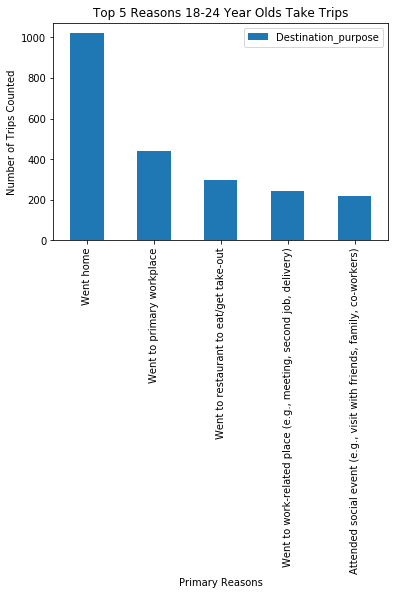

<Figure size 432x288 with 0 Axes>

In [13]:
Top_5 = with_age_18_24_table_df_top_5.plot(kind="bar", title="Top 5 Reasons 18-24 Year Olds Take Trips")

Top_5.set_xlabel("Primary Reasons")
Top_5.set_ylabel("Number of Trips Counted")

plt.show()
plt.tight_layout()

plt.savefig("Visualizations/top_5_reasons.png",  dpi=180, bbox_inches="tight")